In [23]:
from sklearn.linear_model import LogisticRegression
import scipy.io
import numpy as np
import h5py
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import pearsonr
import itertools

# Load Data

In [24]:
#load data
dataset = 'IndianPines'

if dataset == 'IndianPines':
    data = h5py.File('data/original_paper/data4classification/indian_pines_randomSampling_0.1_run_1.mat', 'r')
    selected_bands = scipy.io.loadmat('data/original_paper/results/drl_30_bands_indian_pines.mat')
elif dataset == 'Botswana':
    data = scipy.io.loadmat('data/original_paper/data4classification/botswana_randomSampling_0.1_run_1.mat')
    selected_bands = scipy.io.loadmat('data/original_paper/results/drl_30_bands_botswana.mat')
    

In [25]:
if dataset == 'IndianPines':
    x_train = np.array(data['x_tra']).transpose()
    y_train = np.argmax(np.array(data['y_tra']).transpose(), axis=1)
    x_test = np.array(data['x_test']).transpose()
    y_test = np.argmax(np.array(data['y_test']).transpose(), axis=1)

elif dataset == 'Botswana':
    x_train = np.array(data['x_tra'])
    y_train = np.argmax(np.array(data['y_tra']), axis=1)
    x_test = np.array(data['x_test'])
    y_test = np.argmax(np.array(data['y_test']), axis=1)
        
selected_bands = selected_bands['selected_bands'][0].astype(int)

In [26]:
x_train.shape

(1043, 200)

In [27]:
y_train.shape

(1043,)

In [28]:
x_test.shape

(9323, 200)

In [29]:
y_test.shape

(9323,)

In [30]:
def runAvgCorrelation(x_test):
    x_test = pd.DataFrame(x_test)
    
    correlations = {}
    columns = x_test.columns.tolist()

    for col_a, col_b in itertools.combinations(columns, 2):
        correlations[str(col_a) + '__' + str(col_b)] = pearsonr(x_test.loc[:, col_a], x_test.loc[:, col_b])

    result = pd.DataFrame.from_dict(correlations, orient='index')
    result.columns = ['PCC', 'p-value']

    return result['PCC'].sum()/len(result['PCC'])
    
    

In [31]:
#running the correlation using researchers selected bands
x_train_researchers_bands = x_train[:, selected_bands]
x_test_researchers_band = x_test[:, selected_bands]
runAvgCorrelation(x_test_researchers_band)

0.28610255865592354

In [32]:
#running the correlation using randomly selected bands
corr = []
available_bands = np.arange(0, x_test.shape[1], 1)
iterations = 200
for i in range(iterations):
    
    sample_bands = np.random.choice(available_bands, 30, replace=False)
    
    x_test_random_bands = x_test[:, sample_bands]
    corr.append(runAvgCorrelation(x_test_random_bands))

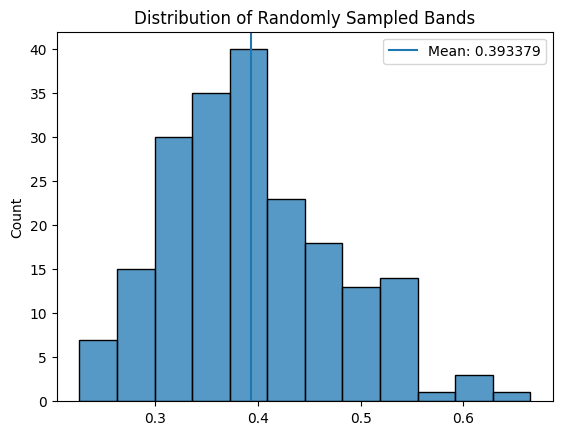

In [33]:
mean_corr = np.mean(corr)

sns.histplot(corr)
plt.axvline(mean_corr, label=f'Mean: {mean_corr:.6f}')
plt.title('Distribution of Randomly Sampled Bands')
plt.legend()
plt.show()